Amb la informació separada de dia, mes i any, creo un camp Data
Calculo per cada vol el retard del mateix, respecte a la previsió.
Creo la columna per la velocitat mitjana, a partir dels valor de la distància de vol, i el temps que l'avió ha estat enlairat.


Text(0, 0.5, 'Nº Vols')

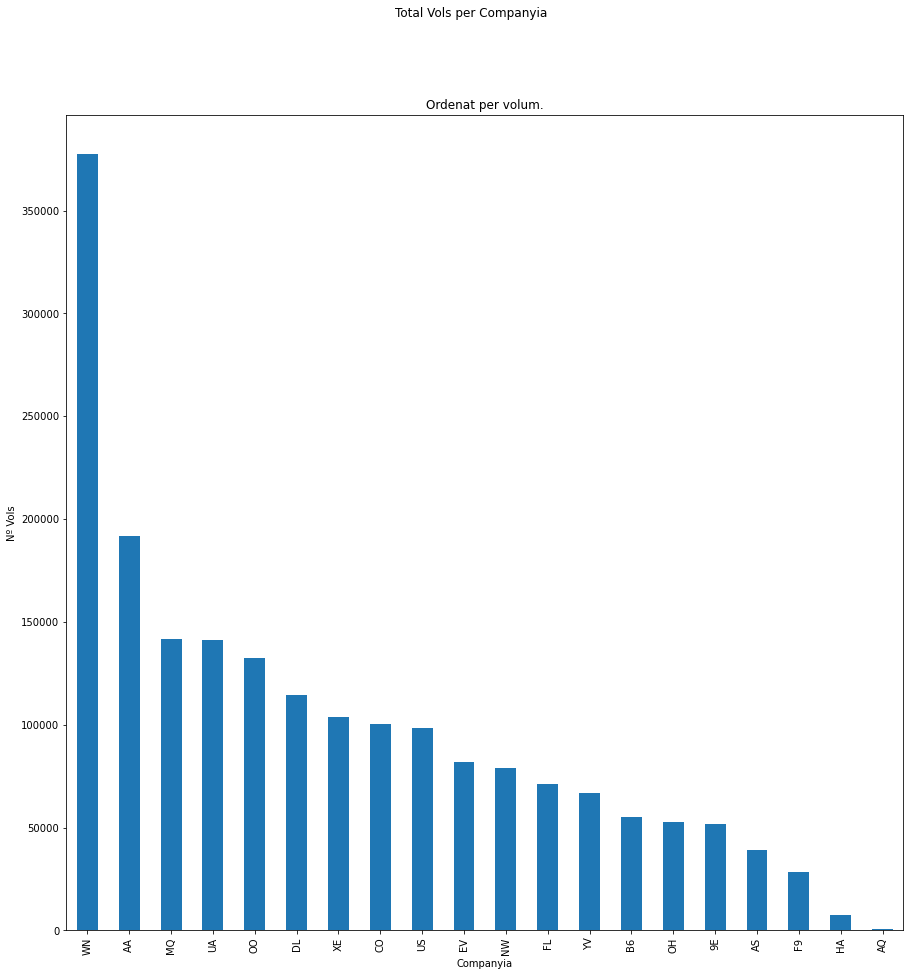

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = (15, 15)
Delayed=pd.read_csv('DelayedFlights.csv')
print("Amb la informació separada de dia, mes i any, creo un camp Data")
Delayed['Data']=pd.to_datetime(Delayed['Year'].astype('string')+'/'+Delayed['Month'].astype('string')+'/'+Delayed['DayofMonth'].astype('string'))
print("Calculo per cada vol el retard del mateix, respecte a la previsió.")
Delayed['Retard']=Delayed['CarrierDelay']+Delayed['WeatherDelay']+Delayed['NASDelay']+Delayed['SecurityDelay']+Delayed['LateAircraftDelay']
print("Creo la columna per la velocitat mitjana, a partir dels valor de la distància de vol, i el temps que l'avió ha estat enlairat.")
Delayed['VelMitja']=Delayed['Distance']/Delayed['AirTime']*60
Delayed_01=Delayed.dropna()
#------------------------------------------------------------
Delayed['UniqueCarrier'].value_counts().plot(kind='bar')
plt.suptitle('Total Vols per Companyia')
plt.title("Ordenat per volum.")
plt.xlabel("Companyia")
plt.ylabel("Nº Vols")
plt.savefig("Plot_S04_T01_01.png")

           

Gràfic de vols diaris durant l'any.


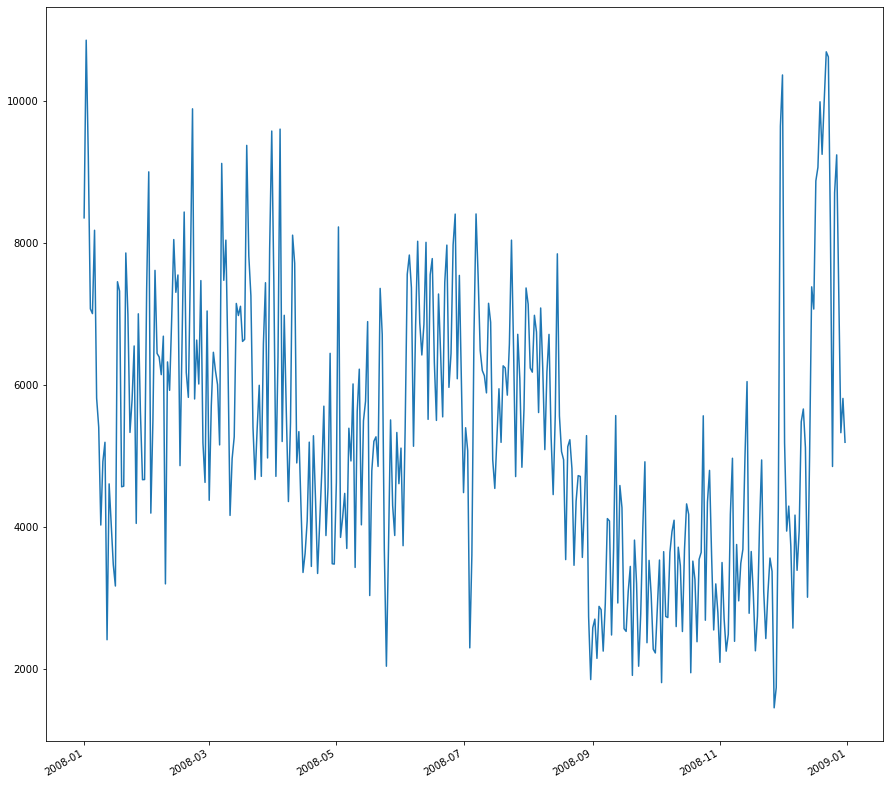

In [21]:
#------------------------------------------------------------
VolsDiaris=Delayed['Data'].value_counts()
print("Gràfic de vols diaris durant l'any.")
VolsDiaris.plot()
plt.savefig("Plot_S04_T01_02.png")

<AxesSubplot:>

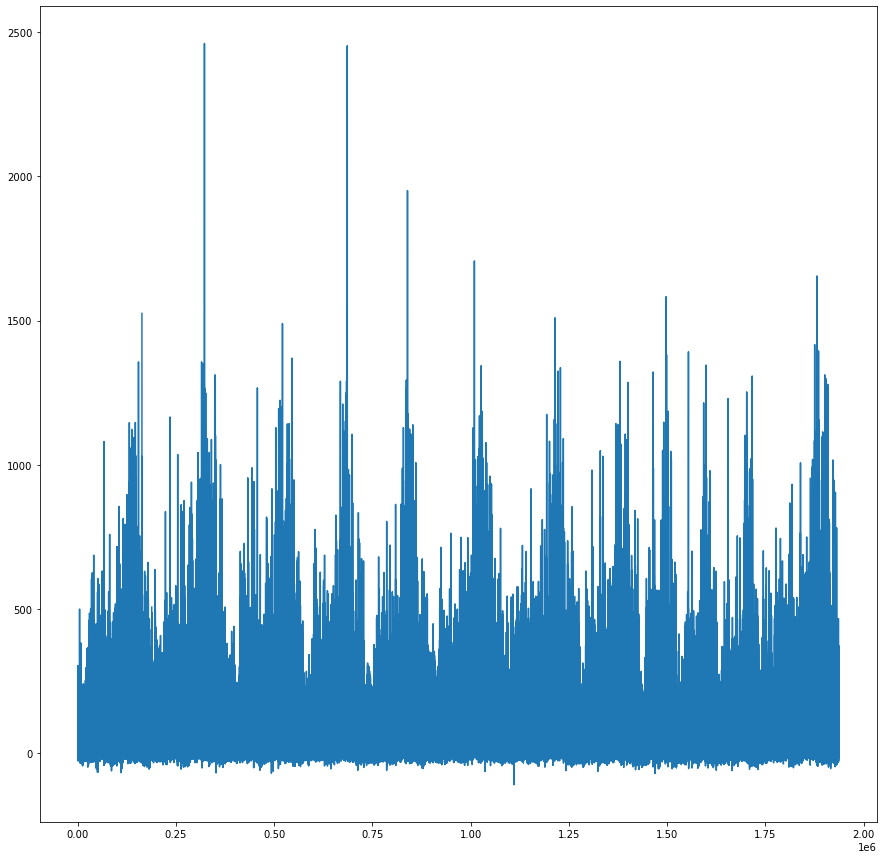

In [13]:
Delayed['ArrDelay'].plot()

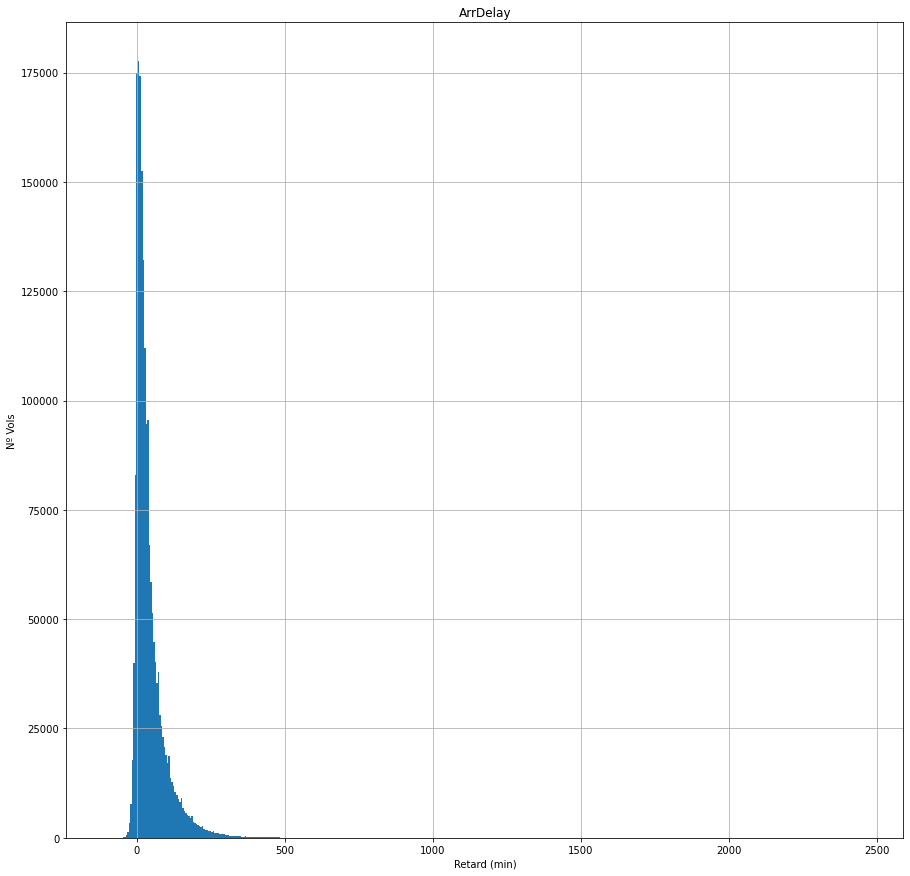

In [22]:
Delayed.hist(column='ArrDelay',bins=500)
plt.xlabel("Retard (min)")
plt.ylabel("Nº Vols")
#plt.hist(x)
#plt.show()
plt.savefig("Plot_S04_T01_03.png")

## Una variable numèrica i una categorica

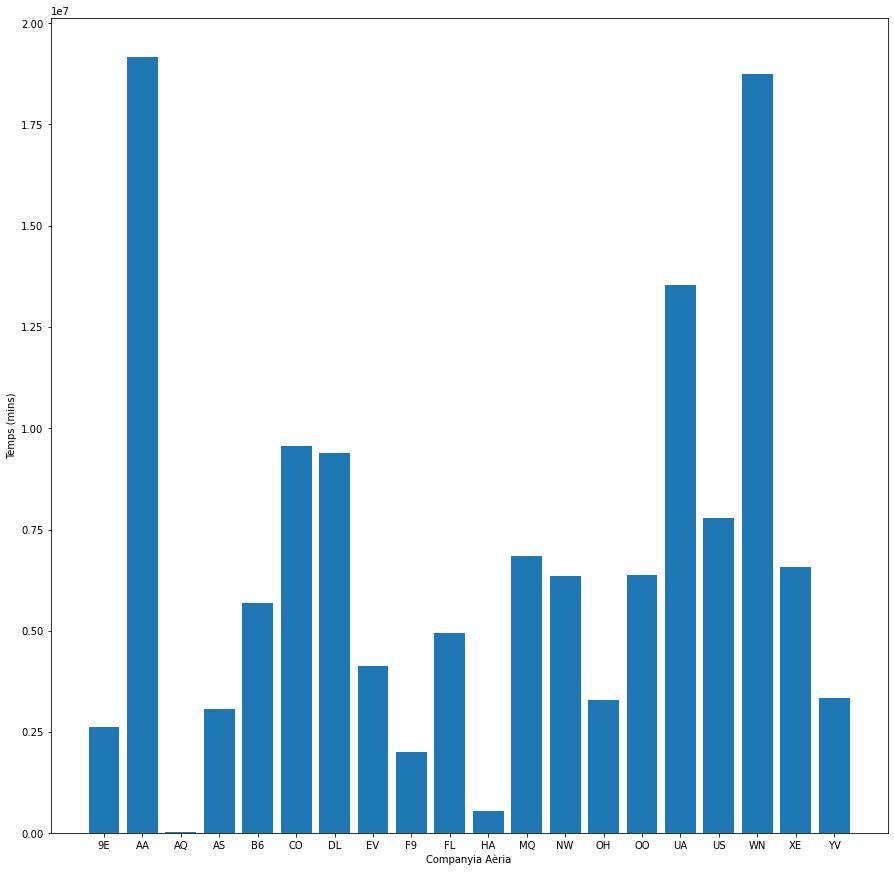

In [23]:
RR=Delayed_01.groupby(['UniqueCarrier']).sum()
plt.bar(RR.index,RR['AirTime'])
plt.ylabel('Temps (mins)')
plt.xlabel('Companyia Aèria')
plt.savefig("Plot_S04_T01_04.png")

## Dues variables numèriques 'ArrDelay' i 'DepDelay'

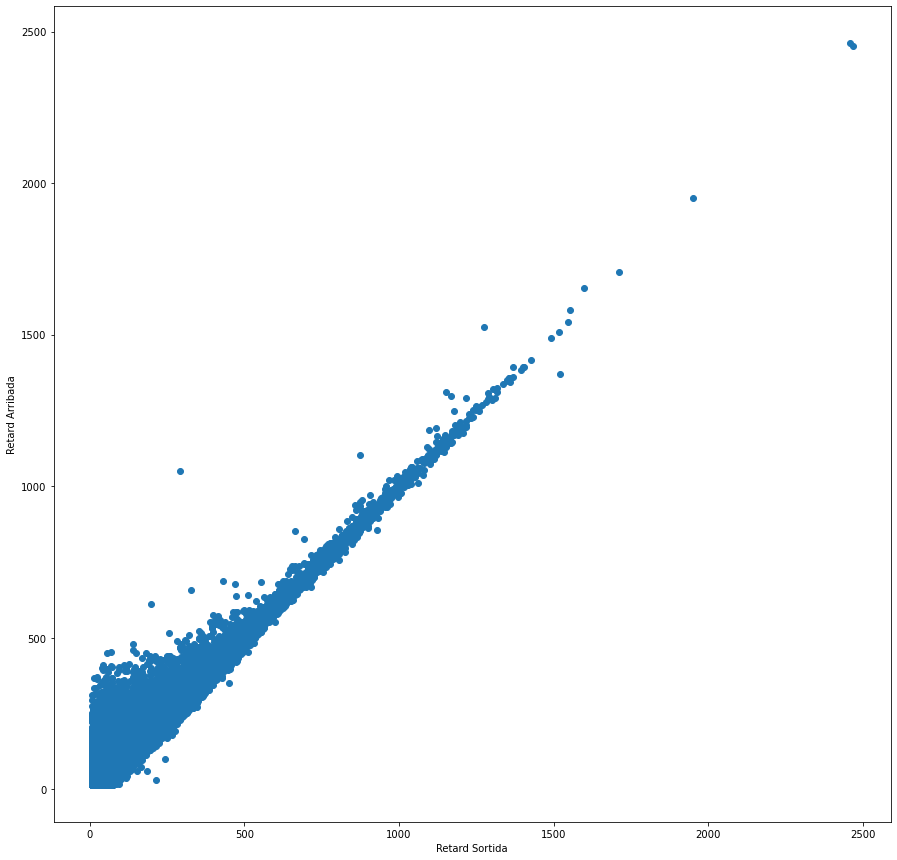

In [24]:
x=Delayed_01['ArrDelay']
y=Delayed_01['DepDelay']
plt.scatter(y,x)
plt.ylabel('Retard Arribada')
plt.xlabel('Retard Sortida')
plt.savefig("Plot_S04_T01_05.png")

## Una variable categòrica ('UniqueCarrier')

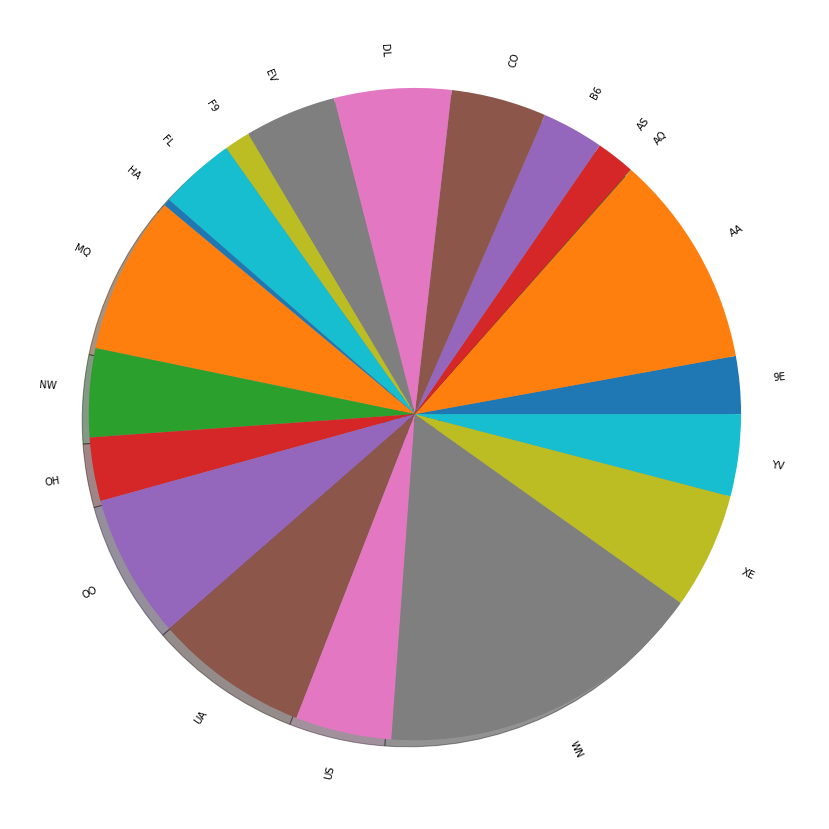

In [25]:
UQ=Delayed_01.groupby(['UniqueCarrier']).count()
etis=UQ.index
plt.pie(UQ['Year'],labels=etis,shadow=True,frame=False,rotatelabels=True)
plt.savefig("Plot_S04_T01_06.png")
plt.show()

## Dues variables numèriques i una categorica

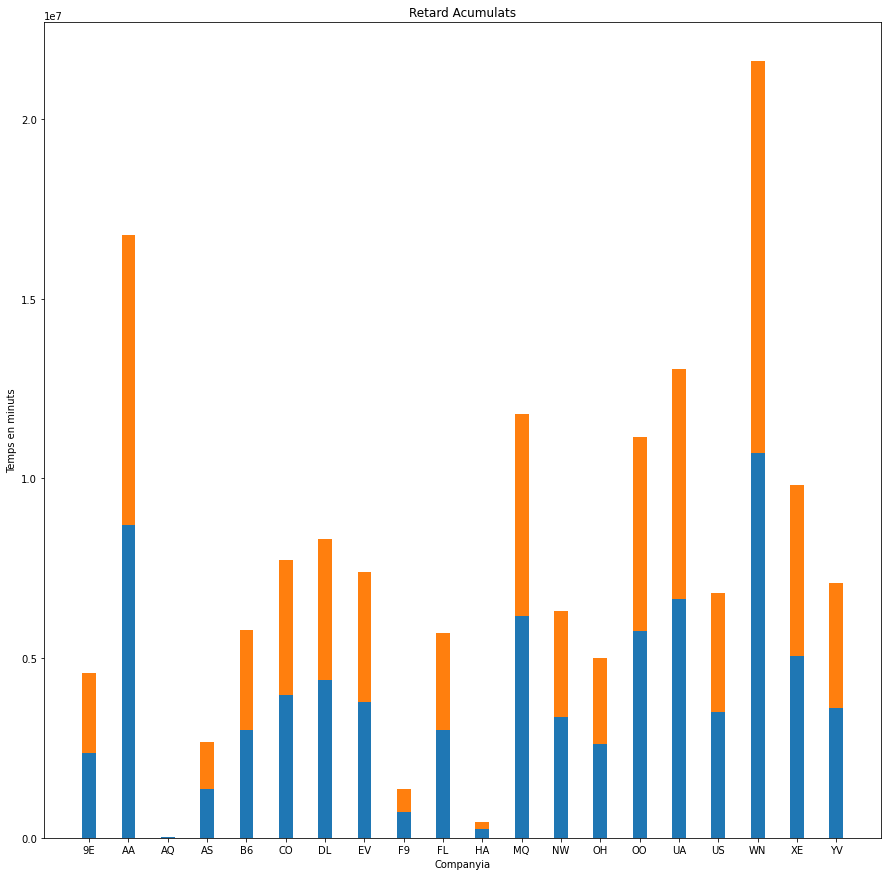

In [26]:
s_1=RR['ArrDelay']
s_2=RR['DepDelay']

plt.bar(etis,s_1,width=0.35)
plt.bar(etis,s_2,width=0.35,bottom=s_1)
plt.ylabel('Temps en minuts')
plt.xlabel('Companyia')
plt.title('Retard Acumulats')
plt.savefig("Plot_S04_T01_07.png")
plt.show()

### Més de tres variables

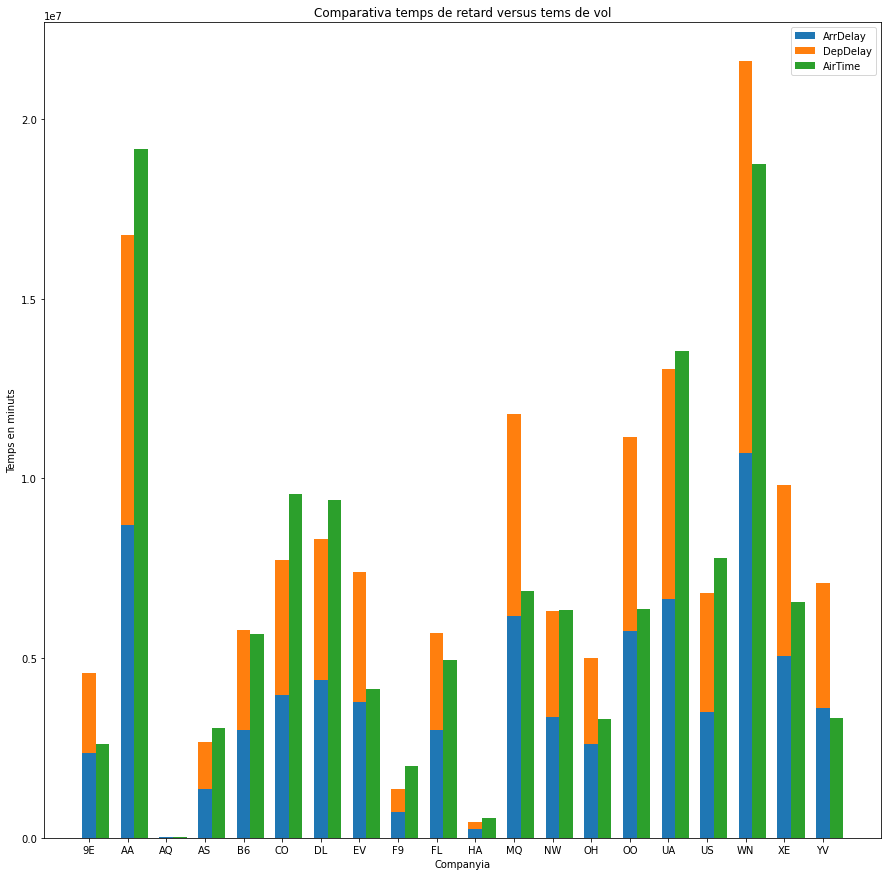

In [30]:
s_1=RR['ArrDelay']
s_2=RR['DepDelay']
s_3=RR['AirTime']
numero_de_grupos = len(s_1)
indice_barras = np.arange(numero_de_grupos)
plt.bar(etis,s_1,width=0.35,label='ArrDelay')
plt.bar(etis,s_2,width=0.35,bottom=s_1,label='DepDelay')
plt.bar(indice_barras+0.35,s_3,width=0.35,label='AirTime')#,bottom=s_1+s_2,label='DepDelay')
plt.legend(loc='best')
plt.ylabel('Temps en minuts')
plt.xlabel('Companyia')
plt.title('Comparativa temps de retard versus tems de vol')
plt.savefig("Plot_S04_T01_08.png")
plt.savefig("Plot_S04_T01_08.jpg")
plt.show()

In [20]:
## Exportar els grafics com a imatges o html